<a href="https://colab.research.google.com/github/jvaaguiar/Img2Mesh/blob/master/Img2Mesh_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [!] Testing config (in/out)

In [0]:
from google.colab import drive
_ = drive.mount('/content/drive')

In [0]:
# checkpoint to load for model
checkpoint_path = '\'/content/drive/My Drive/Img2Mesh/checkpoints/checkpoint_4096_64.zip\''

In [0]:
tarpath  = '/content/drive/\'My Drive\'/Img2Mesh/dataset/tars/'

In [0]:
# select only one test so data fetch is more efficient
test_class = 'airplane'
tars = [test_class + '.tar.gz']

# use the following line to fetch all classes
# tars = !ls -1 {tarpath}

# Prepare workspace

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
!rm -r Img2Mesh
_ = !git clone https://github.com/jvaaguiar/Img2Mesh.git

import sys
sys.path.append('/content/Img2Mesh')

# Prepare Training

In [0]:
datapath = '/content/Img2Mesh/data'
!mkdir {datapath}

for tar in tars:
  !tar -xf {tarpath + tar} -C {datapath}

In [0]:
# get only the test data!!!
paths = []
for t in tars:
  paths.append(datapath + '/' + t.replace('.tar.gz', '/test')) 

In [0]:
from train_mesh import prepareTrainData
X, Y, faces = prepareTrainData(paths)
print(X.shape)

(100, 1, 400, 400)


# Load model (checkpoint)

In [0]:
!mkdir checkpoint
_ = !unzip {checkpoint_path} -d 'checkpoint'
!mkdir Img2Mesh/checkpoints/
!mv checkpoint/content/Img2Mesh/checkpoints/* Img2Mesh/checkpoints/
!rm -r checkpoint

In [0]:
from train import prepareNN
net, optim = prepareNN(model='lean', hidden_size=4096, out_verts=64)

In [0]:
from train import updateModel
updateModel(optim.model, '/content/Img2Mesh/checkpoints/check')

# Check Weights

In [0]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d (MaxPooling2D) (None, 1, 100, 100)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 98, 98)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 30, 30)        6960      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 10, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 8, 8)          31176     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 6, 6)          4

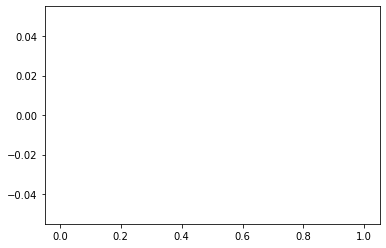

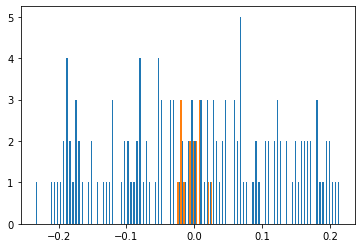

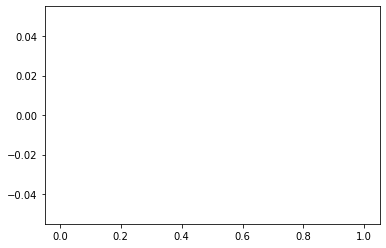

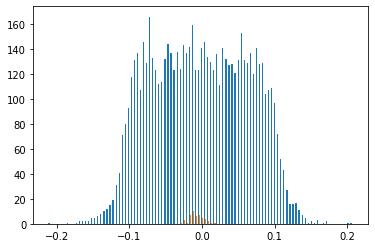

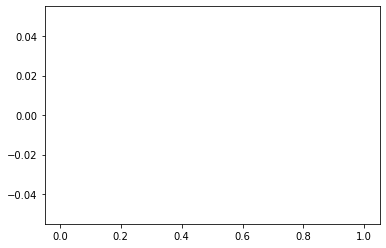

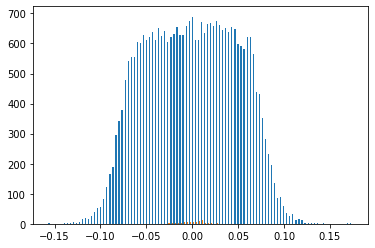

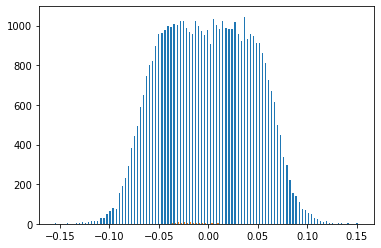

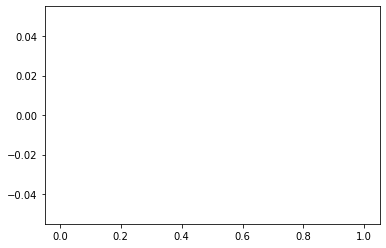

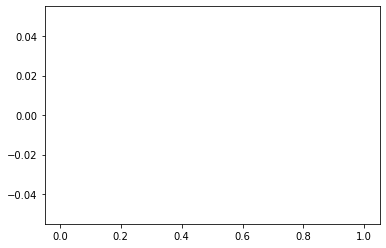

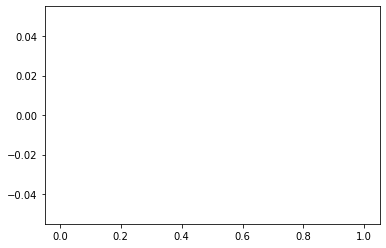

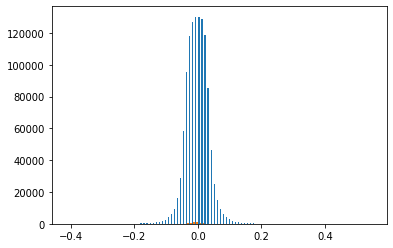

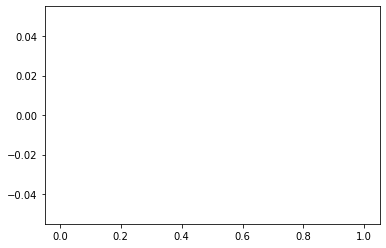

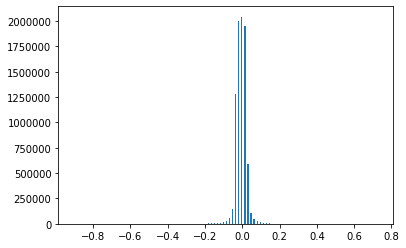

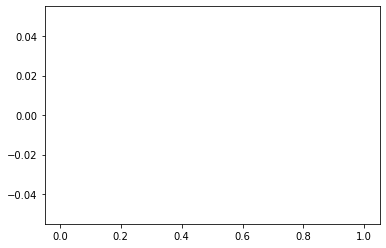

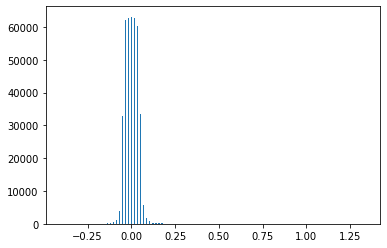

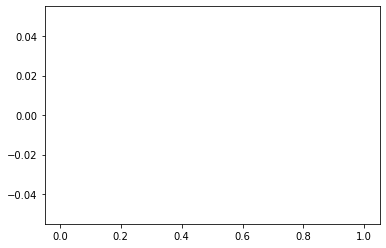

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

for l in optim.model.layers:
  plt.hist(l.get_weights(), bins=100)
  plt.show()
#weights = tf.compat.v1.get_default_graph().get_tensor_by_name('dense_2' + '/weights:0')

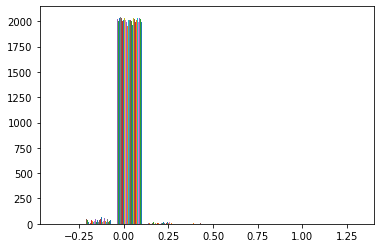

In [0]:
_ = plt.hist(optim.model.layers[-2].get_weights()[0])

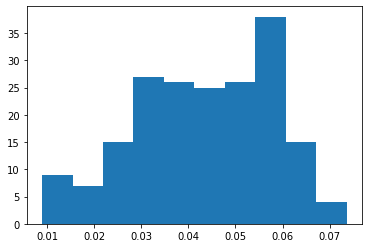

In [0]:
_ = plt.hist(optim.model.layers[-2].get_weights()[1])

# Test

In [0]:
# id of the object in the array to test
id = 10

#### **CHECK INPUT**

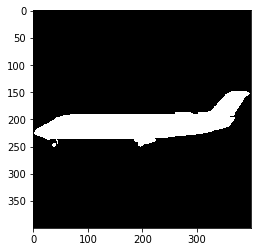

In [0]:
import matplotlib.pyplot as plt
_ = plt.imshow(X[id][0], cmap='gray')

#### **CHECK OUTPUT**

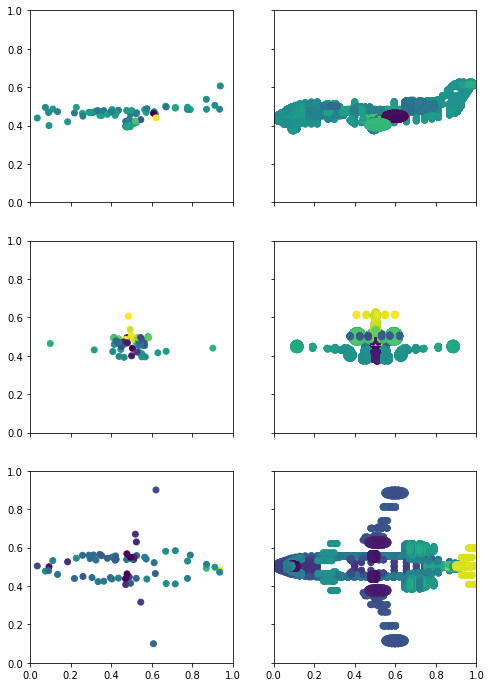

In [0]:
y_ = net(X[id:id+1])
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8,12))
axs[0, 0].set_xlim(0, 1), axs[0, 0].set_ylim(0, 1)

_ = axs[0, 0].scatter(y_[0][:,0],    y_[0][:,2],    c=y_[0][:,1])
_ = axs[0, 1].scatter(Y[id][:,0],    Y[id][:,2],    c=Y[id][:,1])

_ = axs[1, 0].scatter(y_[0][:,1],    y_[0][:,2],    c=y_[0][:,0])
_ = axs[1, 1].scatter(Y[id][:,1],    Y[id][:,2],    c=Y[id][:,0])

_ = axs[2, 0].scatter(y_[0][:,0],    y_[0][:,1],    c=y_[0][:,2])
_ = axs[2, 1].scatter(Y[id][:,0],    Y[id][:,1],    c=Y[id][:,2])


#### **EXPORT OUTPUT**

Export network's output with the reference mesh (to compare) as an .obj file

To open the file:
* Windows 10 : Windows' 3D ModelViewer
* Linux : with **blender** or online with http://3dviewer.net/


In [0]:
from tools.point_cloud_tools import write_point_cloud_with_reference

# saves the generated point cloud with the reference object in the same '.obj'
# file
save_path = '/content/airplane_w_ref.obj'
write_point_cloud_with_reference(
    points = y_[0],
    ref_verts = Y[id],
    ref_faces = faces[id],
    obj_path = save_path
)

In [0]:
from google.colab import files
files.download(save_path) 

Export only netowork's output as point cloud

In [0]:
from tools.point_cloud_tools import write_point_cloud
save_path = '/content/airplane_only_points.obj'
write_point_cloud(y_[0], save_path)

In [0]:
files.download(save_path)

# Test with a custom 400x400 bmp

In [0]:
import os
import matplotlib.pyplot as plt
bmp_path = '/content/Img2Mesh/test/bottle.bmp'
image= plt.imread(bmp_path)

In [0]:
import numpy as np
image = np.float32(image / 255)
image = image[:,:,0]

#### **INPUT**

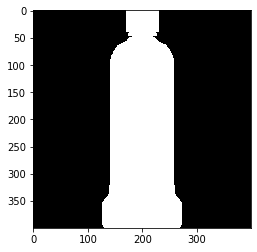

In [0]:
_ = plt.imshow(image, cmap='gray')

#### **OUTPUT**

In [0]:
y_ = net(np.reshape(image, (1, 1, 400, 400)))

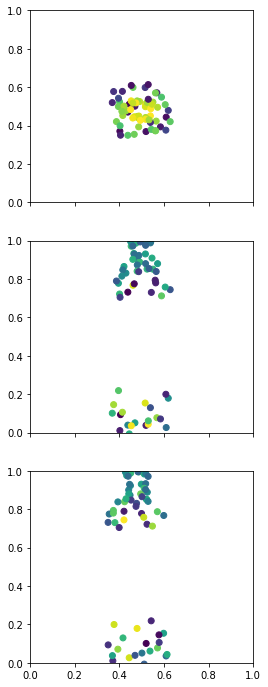

In [0]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(4,12))
axs[0].set_xlim(0, 1), axs[0].set_ylim(0, 1)

_ = axs[0].scatter(y_[0][:,0],    y_[0][:,1],    c=y_[0][:,2])

_ = axs[1].scatter(y_[0][:,0],    y_[0][:,2],    c=y_[0][:,1])

_ = axs[2].scatter(y_[0][:,1],    y_[0][:,2],    c=y_[0][:,0])

In [0]:
save_path = '/content/bottle_test.obj'
write_point_cloud(y_[0], save_path)

In [0]:
files.download(save_path)